In [1]:
# For this project we need to answer the following questions:
# Easy:
#    1. Find all the unique "Wind Spedd" values in the data.
#    2. Find the number of times when the "Weather is exactly Clear".
#    3. Find the number of times when the "Wind Speed was exactly 4 km/h".
#    4. Find out all the Null Values in the data.
#    5. Rename the column name "Weather" of the dataframe to "Weather Condition".
#    6. What is the mean "Visibility" ?
#    7. What is the Standard Deviation of "Pressure" in this data?
#    8. What is the Variance of "Relative Humidity" in this data?
#    9. Find all instances when "Snow" was recorded.
#    10. Find all instances when "Wind Speed is above 24" and "Visibility is 25".
#    11. What is the Mean value of each column against each "Weather Condition"?
#    12. What is the Minimum & Maximum value of each column against each "Weather Condition"?
#    13. Show all the Records where Weather Condition is Fog.
#    14. Find all instances when "Weather is Clear" or "Visibility is above 40".
#    15. Find all instances when:
#        A. "Weather is Clear" and "Relative Humidity is greater than 50"
#        or
#        B. "Visibility is above 40"
# Hard:
#    16. Visualize the data.:
#        A. "Wind Speed" vs "Visibility".
#        B. "Humidity" vs "Wind Speed".
#        C. "Daily Temperature Variation".
#    17. Find the average "Visibility" during "Fog".


#              

In [2]:
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("file.csv")

### Primeramente Abrimos el dataframe para ver que tipo de datos contiene

In [4]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [6]:
# Podemos ver que tiene una columna que representa la fecha y hora, pero esta no esta en formato de fecha y hora, por lo que la convertiremos a este formato
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [7]:
# Vamos a separar la columna de fecha y hora en dos columnas diferentes
df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time
df.drop('Date/Time', axis=1, inplace=True)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00
1,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,03:00:00
4,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00


In [8]:
# Question 1

unique_wind_speed = df['Wind Speed_km/h'].unique()
unique_wind_speed

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

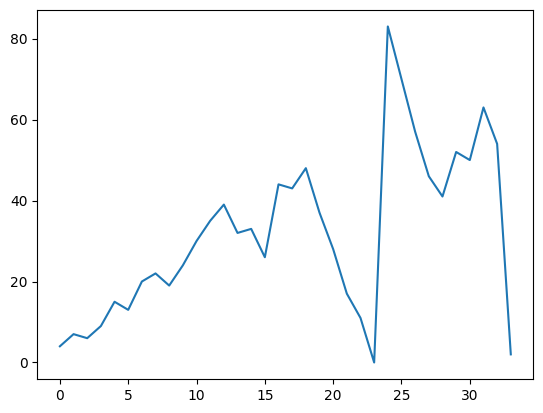

In [9]:
plt.plot(unique_wind_speed)

In [19]:
# Question 2
weathear_clear = df[df["Weather"]=="Clear"]
print(len(weathear_clear))
print(df.Weather.value_counts())
df.groupby("Weather").get_group("Clear")



1326
Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle           

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
67,-16.9,-24.8,50,24,25.0,101.74,Clear,2012-01-03,19:00:00
114,-7.1,-14.4,56,11,25.0,100.71,Clear,2012-01-05,18:00:00
115,-9.2,-15.4,61,7,25.0,100.80,Clear,2012-01-05,19:00:00
116,-9.8,-15.7,62,9,25.0,100.83,Clear,2012-01-05,20:00:00
117,-9.0,-14.8,63,13,25.0,100.83,Clear,2012-01-05,21:00:00
...,...,...,...,...,...,...,...,...,...
8646,-13.4,-14.8,89,4,25.0,102.47,Clear,2012-12-26,06:00:00
8698,-6.1,-8.6,82,19,24.1,101.27,Clear,2012-12-28,10:00:00
8713,-11.9,-13.6,87,11,25.0,101.31,Clear,2012-12-29,01:00:00
8714,-11.8,-13.1,90,13,25.0,101.33,Clear,2012-12-29,02:00:00


In [20]:
# Question 3
wind_speed_4 = df[df["Wind Speed_km/h"]==4]
print(len(wind_speed_4))
print(df["Wind Speed_km/h"].value_counts())
df.groupby("Wind Speed_km/h").get_group(4)

474
Wind Speed_km/h
9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
70      1
83      1
63      1
54      1
Name: count, dtype: int64


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00
1,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00
96,-8.8,-11.7,79,4,9.7,100.32,Snow,2012-01-05,00:00:00
101,-7.0,-9.5,82,4,4.0,100.19,Snow,2012-01-05,05:00:00
146,-8.1,-11.1,79,4,19.3,100.15,Cloudy,2012-01-07,02:00:00
...,...,...,...,...,...,...,...,...,...
8768,-8.6,-10.3,87,4,3.2,101.14,Snow Showers,2012-12-31,08:00:00
8769,-8.1,-9.6,89,4,2.4,101.09,Snow,2012-12-31,09:00:00
8770,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog",2012-12-31,10:00:00
8772,-5.8,-7.5,88,4,12.9,100.78,Snow,2012-12-31,12:00:00


In [21]:
# Question 4
null_values = df.isnull().sum()
null_values

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
Date                0
Time                0
dtype: int64

In [22]:
# Question 5
df.rename(columns={"Weather":"Weather Condition"}, inplace=True)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition,Date,Time
0,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00
1,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,03:00:00
4,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00


In [24]:
# Question 6
mean_visibility = df["Visibility_km"].mean()
float(mean_visibility)

27.664446721311478